## __Tarea 3 - Parcial 1 "Tiempo de Corrección"__
Acorde a información estratégica y de medición sobre el proceso de corrección se determinan los siguientes estados, en el estado de corregidos fácil se determina que el 60% de registros se resuelven, pero estos corregidos fácil pueden pasar al estatus de corrección complicada en un 30% y a un estatus de corrección muy compleja pueden pasar el 10%.

A esta estrategia de medición se determina que la corrección complicada podría (estancarse)/resolverse en este mismo estatus en un 15%, a la corrección final se estima transiten un 75% y pueden transitar al estado de corrección muy compleja el 10%.

En el estatus de corrección muy compleja podrían permanecer y resolverse un 10% en prolongarse su solución y estos podrán pasar al estatus de corregidos fácil y al estatus de corrección complicada un 89% y 1%, respectivamente.

Tome en cuenta y asuma que en cada estado mencionado [Corregidos Fácil, Corrección Complicada, Corrección Muy Compleja] se resuelven los porcentajes de los estados mencionados.


Tome en cuenta lo siguiente:

· Una corrección fácil se tarda en promedio 12 minutos.

· Una corrección complicada se puede tomar 20 minutos.

· Una corrección muy compleja tarda en promedio 31 minutos.

La jordana laboral es de lunes a viernes de 9 a.m. a 4 p.m.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

m1 = np.matrix([[0.6, 0.3, 0.1],[0.75, 0.15, 0.1],[0.89, 0.01, 0.1]])
m_aux = np.matrix([[],[],[]])
m_aux_anterior = np.matrix([[],[],[]])

In [9]:
for i in range(1000):
    if i == 0:
        m_aux = np.dot(m1, m1)
        print(m_aux)
        print("1-----------", i+1)
    else:
        y = i + 1
        m_aux_anterior = m_aux
        m_aux = np.dot(m_aux, m1)
        print(m_aux)
        
        if(np.array_equal(m_aux, m_aux_anterior)):
            break
        print(y, "-----------", i+1)

print()
print("La matriz estable es:\n", np.round(m_aux, 4))
m_aux = np.round(m_aux, 4)
        

[[0.674  0.226  0.1   ]
 [0.6515 0.2485 0.1   ]
 [0.6305 0.2695 0.1   ]]
1----------- 1
[[0.6629   0.2371   0.1     ]
 [0.666275 0.233725 0.1     ]
 [0.669425 0.230575 0.1     ]]
2 ----------- 2
[[0.664565   0.235435   0.1       ]
 [0.66405875 0.23594125 0.1       ]
 [0.66358625 0.23641375 0.1       ]]
3 ----------- 3
[[0.66431525 0.23568475 0.1       ]
 [0.66439119 0.23560881 0.1       ]
 [0.66446206 0.23553794 0.1       ]]
4 ----------- 4
[[0.66435271 0.23564729 0.1       ]
 [0.66434132 0.23565868 0.1       ]
 [0.66433069 0.23566931 0.1       ]]
5 ----------- 5
[[0.66434709 0.23565291 0.1       ]
 [0.6643488  0.2356512  0.1       ]
 [0.6643504  0.2356496  0.1       ]]
6 ----------- 6
[[0.66434794 0.23565206 0.1       ]
 [0.66434768 0.23565232 0.1       ]
 [0.66434744 0.23565256 0.1       ]]
7 ----------- 7
[[0.66434781 0.23565219 0.1       ]
 [0.66434785 0.23565215 0.1       ]
 [0.66434788 0.23565212 0.1       ]]
8 ----------- 8
[[0.66434783 0.23565217 0.1       ]
 [0.66434782 0.2356

In [10]:
print("Probabilidad de caso CORRECCIÓN FÁCIL: ", m_aux[0, 0]*100, "%")
print("Probabilidad de caso CORRECCIÓN COMPLICADA: ", m_aux[0, 1]*100, "%")
print("Probabilidad de caso CORRECCIÓN MUY COMPLICADA: ", m_aux[0, 2]*100, "%")

Probabilidad de caso CORRECCIÓN FÁCIL:  66.43 %
Probabilidad de caso CORRECCIÓN COMPLICADA:  23.57 %
Probabilidad de caso CORRECCIÓN MUY COMPLICADA:  10.0 %


Una vez obtenidos los porcentaejes de caso, se hace el cálculo de cuánto tiempo se tardará en hacer las correciones sobre el dataset de refernciación. Tomando en cuenta que:
- Una corrección fácil se tarda en promedio 12 minutos.
- Una corrección complicada se puede tomar 20 minutos.
- Una corrección muy compleja tarda en promedio 31 minutos.
- La jordana laboral es de lunes a viernes de 9 a.m. a 4 p.m.
- Hay aproximadamente 5499 registros erróneos.

El cálculo asume que todos los registros se corrigen de acuerdo con la distrubución estacionaria de la cadena de Markov y que el trabajo se realiza contínuamente las 7 horas laborales 5 días a la semana.

In [11]:
#TIEMPO DE CORRECCIÓN EN MINUTOS
tiempo_CF = 12 
tiempo_CC = 20
tiempo_CMC = 31

#REGISTROS ERRÓNEOS POR CATEGORÍA.
registros_CF = 5498 * (m_aux[0, 0])
registros_CC = 5498 * (m_aux[0, 1])
registros_CMC = 5498 * (m_aux[0, 2])

#TIEMPO POR CATEGORÍA EN MINUTOS
tiempo_total_CF = registros_CF * tiempo_CF
tiempo_total_CC = registros_CC * tiempo_CC
tiempo_total_CMC = registros_CMC * tiempo_CMC

#TIEMPO TOTAL DE LAS 3 CATEGORÍAS EN MINUTOS
tiempo_total = tiempo_total_CF + tiempo_total_CC + tiempo_total_CMC

horas_totales = tiempo_total / 60
dias_laborales = horas_totales / 7
semanas_laborales = dias_laborales / 5

print("Para poder corregir los registros incorrectos se tardaría ", np.round(dias_laborales, 0), " días laborales o ", np.round(semanas_laborales, 0), " semanas laborales.")


Para poder corregir los registros incorrectos se tardaría  207.0  días laborales o  41.0  semanas laborales.


Se calcula que el tiempo que se tardará en corregir todos los registros incorrectos (supooniendo que los registros se corrigen de acuerdo con la distrubución estacionaria de la cadena de Markov y que el trabajo se realiza contínuamente las 7 horas laborales 5 días a la semana) es de 207 días o 41 semanas laborales.

Ahora se calculará cuanto tiempo se tardaría en corregir el dataset si trabajaran 1, 2, 5 o 10 personas, suponiendo que trabajan en paralelo y de manera independiente.

In [12]:
#CALCULAR TIEMPO SITRABAJAN 1, 2, 5 O 10 PERSONAS EN PARALELO Y DE MANERA INDEPENDIENTE
una_persona = dias_laborales
dos_personas = dias_laborales / 2
cinco_personas = dias_laborales / 5
diez_personas = dias_laborales / 10

print("Si trabajara 1 persona se tardaría ", np.round(una_persona, 0), " días laborales.")
print("Si trabajaran 2 personas se tardaría ", np.round(dos_personas, 0), " días laborales.")
print("Si trabajaran 5 personas se tardaría ", np.round(cinco_personas, 0), " días laborales.")
print("Si trabajaran 10 personas se tardaría ", np.round(diez_personas, 0), " días laborales.")

Si trabajara 1 persona se tardaría  207.0  días laborales.
Si trabajaran 2 personas se tardaría  103.0  días laborales.
Si trabajaran 5 personas se tardaría  41.0  días laborales.
Si trabajaran 10 personas se tardaría  21.0  días laborales.


Se puede apreciar una baja importante en la cantidad de días trabajados según aumenta el personal trabajando en corregir el dataset.

A continuación, se muestran la esrategia visual para el mejor entendimiento del problema.

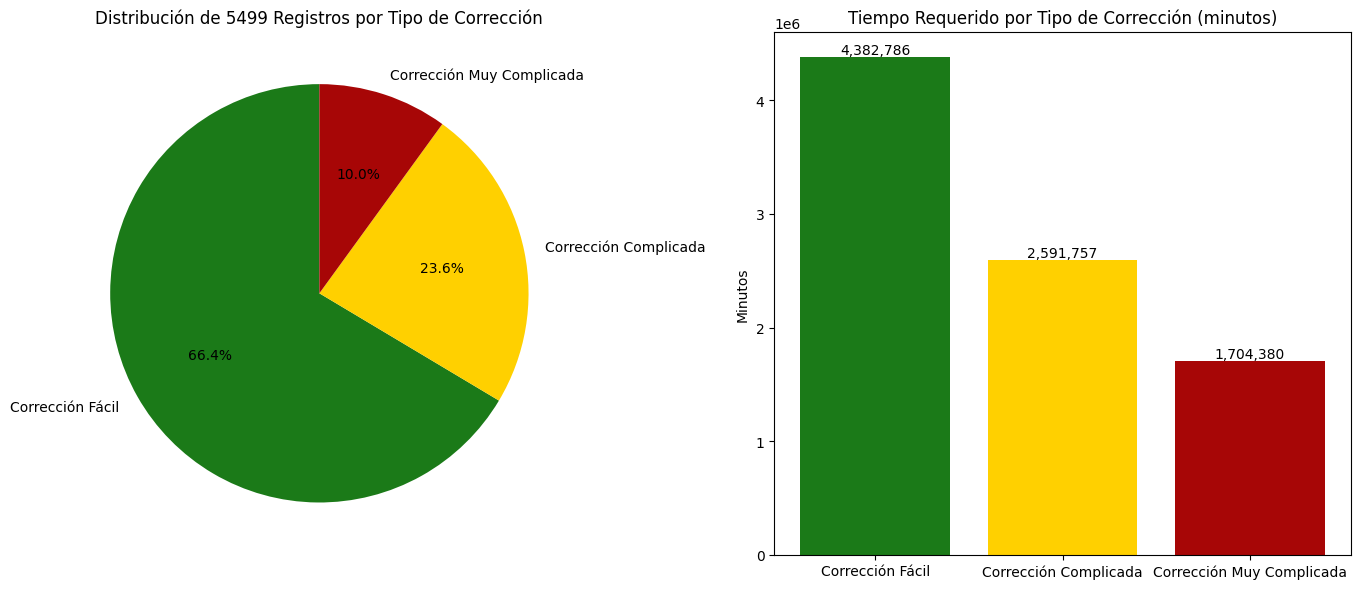

In [13]:
#DATOS OBTENIDOS PARA EL ANÁLISIS
probabilidades = [m_aux[0, 0]*100, m_aux[0, 1]*100, m_aux[0, 2]*100]
etiquetas = ['Corrección Fácil', 'Corrección Complicada', 'Corrección Muy Complicada']
tiempos = [12, 20, 31]
colores = ["#1b7a18","#ffd000","#a70606"]

#CALCULAR REGISTROS POR CATEGORÍA
registros_totales = registros_CF + registros_CC + registros_CMC
registros_por_categoria = [registros_totales * p for p in probabilidades]

#CALCULAR TIEMPO POR CATEGORÍA
tiempo_por_categoria = [registros * tiempo for registros, tiempo in zip(registros_por_categoria, tiempos)]

#DISTRIBCIÓN POR REGISTROS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(registros_por_categoria, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
ax1.set_title('Distribución de 5499 Registros por Tipo de Corrección')

#TIEMPO REQUERID POR CATEGORÍA
bars = ax2.bar(etiquetas, tiempo_por_categoria, color=colores)
ax2.set_title('Tiempo Requerido por Tipo de Corrección (minutos)')
ax2.set_ylabel('Minutos')
ax2.tick_params(axis='x')

for bar, valor, color in zip(bars, tiempo_por_categoria, colores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 500, f'{valor:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

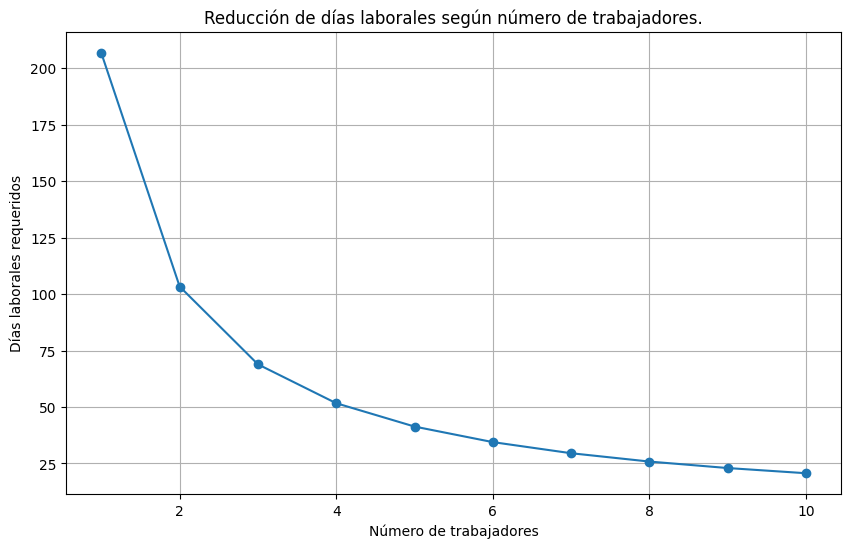

In [14]:
#GRAFICAR LA BAJA DE DÍAS LABORALES SEGÚN AUMENTE EL PERSONAL
trabajadores = np.arange(1, 11)
dias_por_trabajadores = una_persona / trabajadores

plt.figure(figsize=(10,6))
plt.plot(trabajadores, dias_por_trabajadores, marker='o')
plt.title("Reducción de días laborales según número de trabajadores.")
plt.xlabel("Número de trabajadores")
plt.ylabel("Días laborales requeridos")
plt.grid(True)
plt.show()